Determine whether there is an increase in activity level among users after installing Sweatcoin app.
\
Data Anlysis by Kseniia Nikulina

In [228]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import shapiro
from scipy.stats import wilcoxon

## Data preprocessing

In [229]:
df = pd.read_csv('test-task.csv') #file reading
df

,Unnamed: 0,user_id,platform,reg_date,steps_date,steps
0,0,41785284,IOS,2021-04-21,2021-04-13,458
1,1,41792465,IOS,2021-04-21,2021-04-13,5750
2,2,41494466,IOS,2021-03-28,2021-04-01,5635
3,3,41583452,IOS,2021-04-02,2021-04-01,1840
4,4,41637532,IOS,2021-04-07,2021-04-01,3127
...,...,...,...,...,...,...
81544,81544,40888496,IOS,2021-01-29,2021-02-07,350
81545,81545,41010128,ANDROID,2021-02-11,2021-02-07,0
81546,81546,40741168,IOS,2021-01-15,2021-01-02,10292
81547,81547,40736310,ANDROID,2021-01-15,2021-01-02,0


#### Drop column with no useful info

In [230]:
df.drop(df.columns[0], axis=1, inplace=True) 
df

,user_id,platform,reg_date,steps_date,steps
0,41785284,IOS,2021-04-21,2021-04-13,458
1,41792465,IOS,2021-04-21,2021-04-13,5750
2,41494466,IOS,2021-03-28,2021-04-01,5635
3,41583452,IOS,2021-04-02,2021-04-01,1840
4,41637532,IOS,2021-04-07,2021-04-01,3127
...,...,...,...,...,...
81544,40888496,IOS,2021-01-29,2021-02-07,350
81545,41010128,ANDROID,2021-02-11,2021-02-07,0
81546,40741168,IOS,2021-01-15,2021-01-02,10292
81547,40736310,ANDROID,2021-01-15,2021-01-02,0


#### Check data types

In [231]:
df.dtypes

user_id        int64
platform      object
reg_date      object
steps_date    object
steps          int64
dtype: object

In [232]:
df[['reg_date', 'steps_date']] = df[['reg_date', 'steps_date']].apply(pd.to_datetime, errors='coerce') 
df.dtypes #object to datetime

user_id                int64
platform              object
reg_date      datetime64[ns]
steps_date    datetime64[ns]
steps                  int64
dtype: object

#### Check null values in the df

In [233]:
df.isnull().sum() 

user_id         0
platform      123
reg_date        0
steps_date      0
steps           0
dtype: int64

#### Platfroms check
- If these users have activity recorded on other dates with a specified platform and it's consistent (only one platform is used), then fill the missing platform information with that value.
- Ensure that each user has only one platform (no duplicates or bugs)

Missing platfroms check

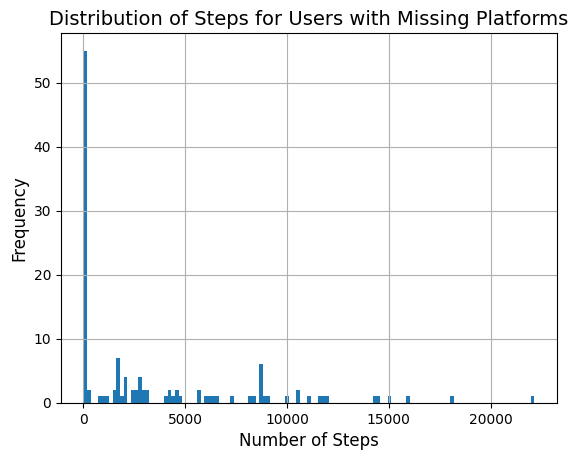

In [234]:
# Check how many steps have users with missing platforms
df.loc[df['platform'].isnull()]['steps'].hist(
    bins=123
)

plt.title("Distribution of Steps for Users with Missing Platforms", fontsize=14)
plt.xlabel("Number of Steps", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.grid(True)
plt.show()

In [235]:
# Identify users with missing platform information
missing_platform_users = df[df['platform'].isnull()]['user_id'].unique()
missing_platform_users

array([41316658, 41232611, 41580994, 40971110, 41393245])

In [236]:
# Check if they have data from other days
missing_platform_data = df[df['user_id'].isin(missing_platform_users)]
missing_platform_data.platform.unique()

array([nan], dtype=object)

In [237]:
# No such days were found, so we delete these users
df = df.loc[df['platform'].notnull()]
df.isnull().sum()

user_id       0
platform      0
reg_date      0
steps_date    0
steps         0
dtype: int64

Platform count check

In [238]:
# Check the number of unique platforms used by each user
platform_check = df.groupby('user_id')['platform'].nunique()

# Select users who have more than one unique platform
users_with_multiple_platforms = platform_check[platform_check > 1]

#Output number of users
users_with_multiple_platforms

# No such users were found

Series([], Name: platform, dtype: int64)

#### Check steps distrubution

It was stated that 0 bugs were acquired in this dataframe, so I remove people with 0 steps, as these users do not bring any useful info to the df

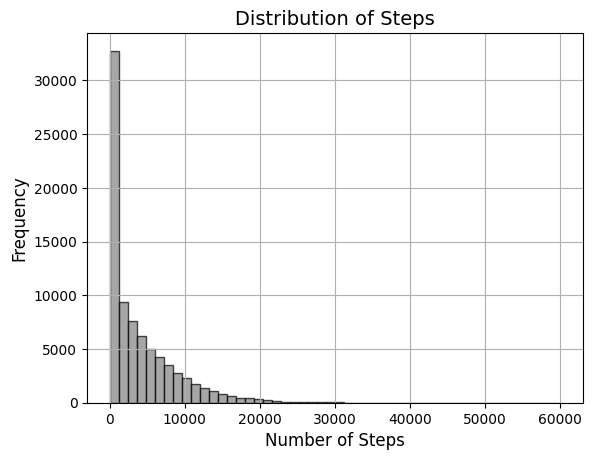

In [239]:
# Steps distribution
df['steps'].hist(bins=50, color='gray', edgecolor='black', alpha=0.7, label='Data')

plt.title("Distribution of Steps", fontsize=14)
plt.xlabel("Number of Steps", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.grid(True) 
plt.show()

In [240]:
# Remove people with 0 steps
df = df.loc[(df['steps'] > 0)]
df

,user_id,platform,reg_date,steps_date,steps
0,41785284,IOS,2021-04-21,2021-04-13,458
1,41792465,IOS,2021-04-21,2021-04-13,5750
2,41494466,IOS,2021-03-28,2021-04-01,5635
3,41583452,IOS,2021-04-02,2021-04-01,1840
4,41637532,IOS,2021-04-07,2021-04-01,3127
...,...,...,...,...,...
81540,41108129,IOS,2021-02-22,2021-02-13,1995
81542,40947633,IOS,2021-02-04,2021-02-07,3646
81543,41057248,IOS,2021-02-16,2021-02-07,277
81544,40888496,IOS,2021-01-29,2021-02-07,350


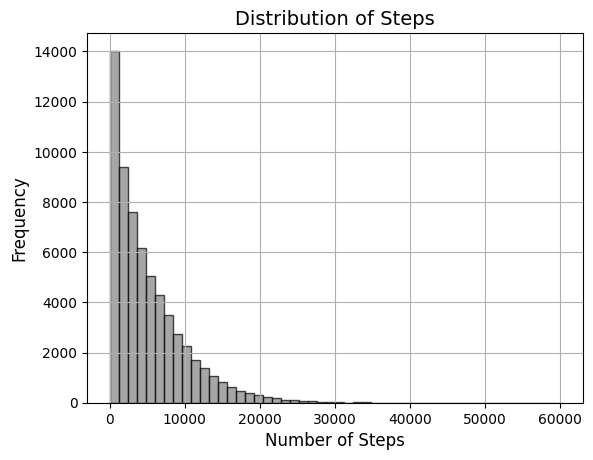

In [241]:
# Steps distribution after removing
df['steps'].hist(bins=50, color='gray', edgecolor='black', alpha=0.7, label='Data')

plt.title("Distribution of Steps", fontsize=14)
plt.xlabel("Number of Steps", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.grid(True) 
plt.show()

Analyzing the remaining values in the steps column after data cleaning, focusing on low step counts that may still represent outliers. These low values might not provide meaningful insights for the analysis and could potentially distort the results.

In [242]:
df.steps.describe()

count    62684.000000
mean      5110.909243
std       4924.687583
min          1.000000
25%       1386.000000
50%       3657.000000
75%       7350.000000
max      60043.000000
Name: steps, dtype: float64

In [243]:
# Remove values below 5 percentile, as it is counted as a low activity 
percentile_5 = np.percentile(df['steps'], 5)
percentile_5

np.float64(209.0)

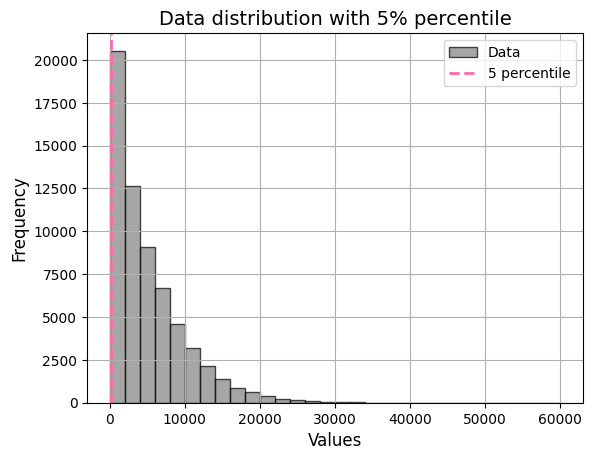

In [244]:
plt.hist(df['steps'], bins=30, color='gray', edgecolor='black', alpha=0.7, label='Data')

# Percentile line
plt.axvline(percentile_5, color='hotpink', linestyle='--', linewidth=2, label='5 percentile')

plt.title('Data distribution with 5% percentile', fontsize=14)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid()

plt.show()

In [245]:
filtered_steps = df[(df['steps'] >= percentile_5)]

# Percent of removed users with low activity
percent_removed = 100 * (len(df) - len(filtered_steps)) / len(df)
print(f"Percent of removed users with low activity: {percent_removed:.2f}%")

Percent of removed users with low activity: 4.98%


In [246]:
# Remove said users
df = df[(df['steps'] >= percentile_5)]

#### Split activity to before and after installation of the app

In [247]:
# Add day count before and after installation 
df.loc[:, 'days_from_reg'] = (df['steps_date'] - df['reg_date']).dt.days
df

/var/folders/cj/5yw5vpbx3w793bdrt43m_7zm0000gn/T/ipykernel_2882/227803009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'days_from_reg'] = (df['steps_date'] - df['reg_date']).dt.days


,user_id,platform,reg_date,steps_date,steps,days_from_reg
0,41785284,IOS,2021-04-21,2021-04-13,458,-8
1,41792465,IOS,2021-04-21,2021-04-13,5750,-8
2,41494466,IOS,2021-03-28,2021-04-01,5635,4
3,41583452,IOS,2021-04-02,2021-04-01,1840,-1
4,41637532,IOS,2021-04-07,2021-04-01,3127,-6
...,...,...,...,...,...,...
81540,41108129,IOS,2021-02-22,2021-02-13,1995,-9
81542,40947633,IOS,2021-02-04,2021-02-07,3646,3
81543,41057248,IOS,2021-02-16,2021-02-07,277,-9
81544,40888496,IOS,2021-01-29,2021-02-07,350,9


In [248]:
# Deep copy so that further changes will not affect the og dataframe
df_copy = df.copy(deep=True)
df_copy

,user_id,platform,reg_date,steps_date,steps,days_from_reg
0,41785284,IOS,2021-04-21,2021-04-13,458,-8
1,41792465,IOS,2021-04-21,2021-04-13,5750,-8
2,41494466,IOS,2021-03-28,2021-04-01,5635,4
3,41583452,IOS,2021-04-02,2021-04-01,1840,-1
4,41637532,IOS,2021-04-07,2021-04-01,3127,-6
...,...,...,...,...,...,...
81540,41108129,IOS,2021-02-22,2021-02-13,1995,-9
81542,40947633,IOS,2021-02-04,2021-02-07,3646,3
81543,41057248,IOS,2021-02-16,2021-02-07,277,-9
81544,40888496,IOS,2021-01-29,2021-02-07,350,9


#### Users removal with no activity before OR after they installed the app

In [249]:
# Group by user_id and check if each user has data both "before" and "after" app installation
valid_users = df_copy.groupby('user_id').apply(
    lambda group: (group['days_from_reg'] >= 0).any() and (group['days_from_reg'] < 0).any()
)

# Select users who have data in both periods
valid_users = valid_users[valid_users].index

# Filter the original DataFrame to keep only these users
df_copy = df_copy[df_copy['user_id'].isin(valid_users)]

/var/folders/cj/5yw5vpbx3w793bdrt43m_7zm0000gn/T/ipykernel_2882/630872936.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  valid_users = df_copy.groupby('user_id').apply(


In [250]:
df_copy

,user_id,platform,reg_date,steps_date,steps,days_from_reg
2,41494466,IOS,2021-03-28,2021-04-01,5635,4
3,41583452,IOS,2021-04-02,2021-04-01,1840,-1
4,41637532,IOS,2021-04-07,2021-04-01,3127,-6
6,41574472,IOS,2021-04-01,2021-04-01,10697,0
7,41719379,IOS,2021-04-14,2021-04-01,2509,-13
...,...,...,...,...,...,...
81533,40902702,IOS,2021-01-30,2021-02-04,1001,5
81540,41108129,IOS,2021-02-22,2021-02-13,1995,-9
81543,41057248,IOS,2021-02-16,2021-02-07,277,-9
81544,40888496,IOS,2021-01-29,2021-02-07,350,9


In [251]:
# Add categorical label before\after to users in the dataset
df_copy.loc[:, 'period'] = df_copy['days_from_reg'].apply(
    lambda x: 'after' if x >= 0 else 'before'
)

df_copy

/var/folders/cj/5yw5vpbx3w793bdrt43m_7zm0000gn/T/ipykernel_2882/1149661057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.loc[:, 'period'] = df_copy['days_from_reg'].apply(


,user_id,platform,reg_date,steps_date,steps,days_from_reg,period
2,41494466,IOS,2021-03-28,2021-04-01,5635,4,after
3,41583452,IOS,2021-04-02,2021-04-01,1840,-1,before
4,41637532,IOS,2021-04-07,2021-04-01,3127,-6,before
6,41574472,IOS,2021-04-01,2021-04-01,10697,0,after
7,41719379,IOS,2021-04-14,2021-04-01,2509,-13,before
...,...,...,...,...,...,...,...
81533,40902702,IOS,2021-01-30,2021-02-04,1001,5,after
81540,41108129,IOS,2021-02-22,2021-02-13,1995,-9,before
81543,41057248,IOS,2021-02-16,2021-02-07,277,-9,before
81544,40888496,IOS,2021-01-29,2021-02-07,350,9,after


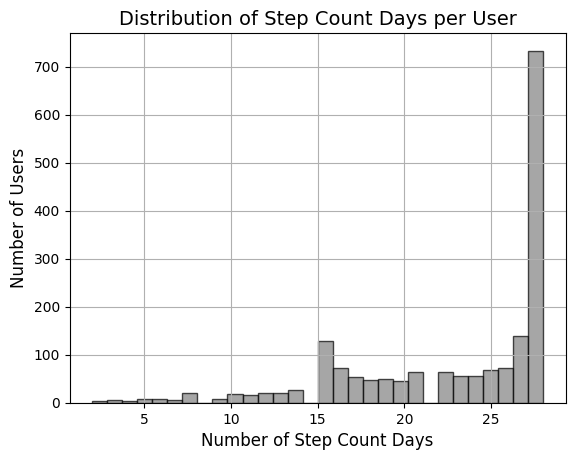

In [252]:
# Count the number of unique 'steps_date' for each user

user_step_counts = df_copy.groupby('user_id')['steps_date'].nunique()
plt.hist(user_step_counts, bins=30, color='gray', edgecolor='black', alpha=0.7)
plt.title("Distribution of Step Count Days per User", fontsize=14)
plt.xlabel("Number of Step Count Days", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.grid(True)
plt.show()

#### Check dates when users walked 
We don't have activity from every day from users, some records are missed (like in total it can be not 28 days, but 20 or so), so we check for weekdays/weekends distribution.

As on the weekends activity can be increased => it leads to more biased activity 

In [253]:
# Add a weekday column
df_copy.loc[:, 'weekday'] = df_copy['steps_date'].dt.weekday  # Monday = 0, Sunday = 6

# Add a "day_type" column to classify weekdays and weekends
df_copy.loc[:, 'day_type'] = df_copy['weekday'].apply(lambda x: 'Weekdays' if x < 5 else 'Weekends')

# Group by period (before/after) and day_type (Weekdays/Weekends)
day_type_distribution = df_copy.groupby(['period', 'day_type'])['steps'].count().unstack()

# Calculate the percentage distribution within each period
day_type_percentages = day_type_distribution.div(day_type_distribution.sum(axis=1), axis=0) * 100

/var/folders/cj/5yw5vpbx3w793bdrt43m_7zm0000gn/T/ipykernel_2882/725543980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.loc[:, 'weekday'] = df_copy['steps_date'].dt.weekday  # Monday = 0, Sunday = 6
/var/folders/cj/5yw5vpbx3w793bdrt43m_7zm0000gn/T/ipykernel_2882/725543980.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.loc[:, 'day_type'] = df_copy['weekday'].apply(lambda x: 'Weekdays' if x < 5 else 'Weekends')


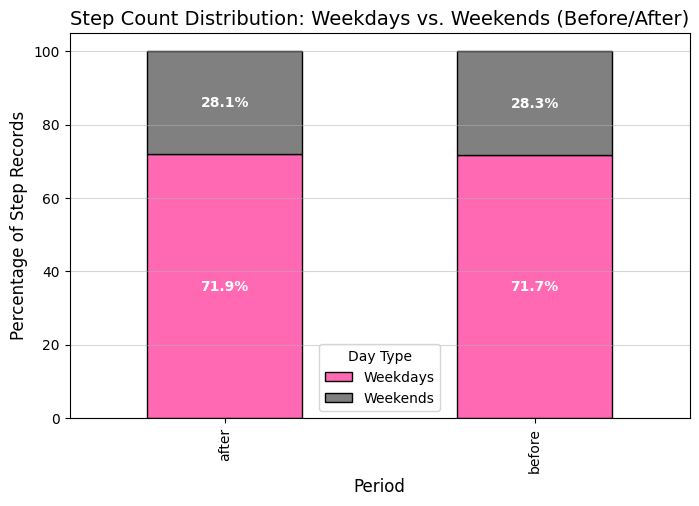

In [254]:
ax = day_type_percentages.plot(
    kind='bar', stacked=True, color=['hotpink', 'gray'], edgecolor='black', figsize=(8, 5)
)

plt.title("Step Count Distribution: Weekdays vs. Weekends (Before/After)", fontsize=14)
plt.xlabel("Period", fontsize=12)
plt.ylabel("Percentage of Step Records", fontsize=12)
plt.legend(title="Day Type")
plt.grid(axis='y', alpha=0.5)

# Annotate percentages on the bars
for i, bar_group in enumerate(ax.containers):
    for bar in bar_group:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f"{height:.1f}%",
                ha='center',
                va='center',
                fontsize=10,
                color='white',
                weight='bold'
            )

plt.show()

Since the weekday-to-weekend ratio is consistent between the before and after periods, we reasonably conclude that step counts were collected under similar day-type conditions. 

However, some users can have activity before only on weekdays and after only on weekends. So it can be unreasonable to compare those users, as activity on the weekend is most likely will be increased due to more free time. I sudgest to leave only those users, who have activity before and after on both weekdays and weekends. 

Count mean value of the steps in this periods

In [255]:
# Group by user_id, period (before/after), and day_type (Weekdays/Weekends)
summary = df_copy.groupby(['user_id', 'period', 'day_type'])['steps'].mean().unstack()

# Reset index
summary = summary.reset_index()
summary.columns.name = None

# Create a pivot table 
pivot_summary = summary.pivot(index='user_id', columns='period', values=['Weekdays', 'Weekends']).round(2)

# Remove the multi-level column names
pivot_summary.columns = ['_'.join(col).strip() for col in pivot_summary.columns.values]

# Reset index
pivot_summary = pivot_summary.reset_index()

# Display the resulting pivot table with no NaN values in the same pariod before/after
pivot_summary = pivot_summary[
    ~(
        (pivot_summary['Weekdays_after'].isna() & pivot_summary['Weekends_after'].notna()) |
        (pivot_summary['Weekdays_before'].isna() & pivot_summary['Weekends_before'].notna()) |
        (pivot_summary['Weekdays_after'].notna() & pivot_summary['Weekends_after'].isna()) |
        (pivot_summary['Weekdays_before'].notna() & pivot_summary['Weekends_before'].isna())
    )
]

# Display the cleaned pivot table
pivot_summary



,user_id,Weekdays_after,Weekdays_before,Weekends_after,Weekends_before
0,19161801,6624.80,3468.20,7890.50,2003.00
1,20395818,474.25,1313.10,386.00,308.00
2,39957739,1138.43,1077.11,1164.75,579.75
4,40572583,2812.70,3341.78,2545.00,2641.50
6,40735506,874.60,1185.20,1034.75,1237.25
...,...,...,...,...,...
1748,41758248,12543.00,8454.10,5642.00,5671.25
1749,41758267,5185.50,10990.40,3701.00,11863.50
1750,41758796,15627.33,13269.50,14514.00,16732.00
1752,41759233,3171.67,5250.20,3542.00,5857.75


In [256]:
# Platform per user
platforms = df_copy.groupby('user_id')['platform'].first().reset_index()

# Inner join for users and their platforms 
pivot_summary = pivot_summary.merge(platforms, on='user_id', how='inner')
pivot_summary.columns.name = None

# Calculate after - before
pivot_summary['Weekdays_difference'] = pivot_summary['Weekdays_after'] - pivot_summary['Weekdays_before']
pivot_summary['Weekends_difference'] = pivot_summary['Weekends_after'] - pivot_summary['Weekends_before']

pivot_summary

,user_id,Weekdays_after,Weekdays_before,Weekends_after,Weekends_before,platform,Weekdays_difference,Weekends_difference
0,19161801,6624.80,3468.20,7890.50,2003.00,IOS,3156.60,5887.50
1,20395818,474.25,1313.10,386.00,308.00,IOS,-838.85,78.00
2,39957739,1138.43,1077.11,1164.75,579.75,IOS,61.32,585.00
3,40572583,2812.70,3341.78,2545.00,2641.50,IOS,-529.08,-96.50
4,40735506,874.60,1185.20,1034.75,1237.25,IOS,-310.60,-202.50
...,...,...,...,...,...,...,...,...
1490,41758248,12543.00,8454.10,5642.00,5671.25,IOS,4088.90,-29.25
1491,41758267,5185.50,10990.40,3701.00,11863.50,IOS,-5804.90,-8162.50
1492,41758796,15627.33,13269.50,14514.00,16732.00,IOS,2357.83,-2218.00
1493,41759233,3171.67,5250.20,3542.00,5857.75,IOS,-2078.53,-2315.75


#### changes_weekdays

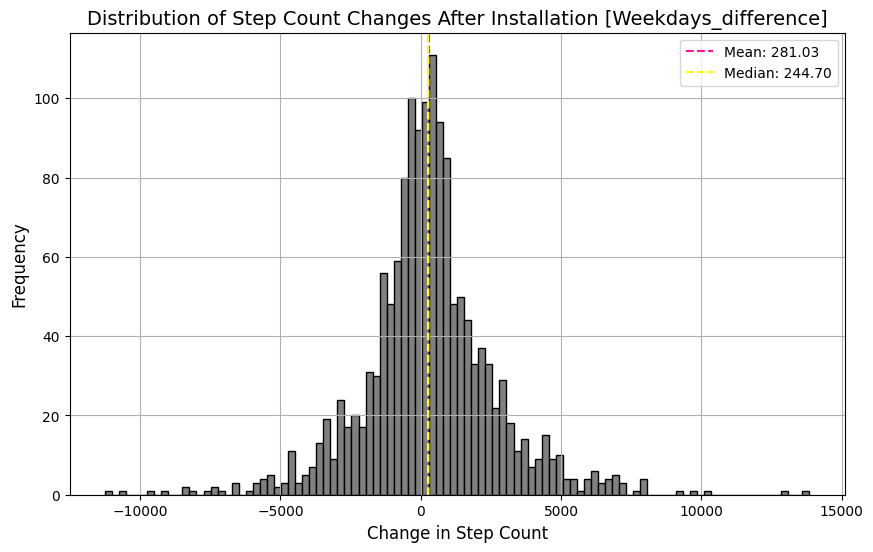

In [257]:
changes_weekdays = pivot_summary['Weekdays_difference']

# Create a histogram to visualize the distribution of step count changes
plt.figure(figsize=(10, 6))
plt.hist(changes_weekdays, bins=100, color='gray', edgecolor='black')

# Add vertical lines for mean and median
plt.axvline(changes_weekdays.mean(), color='deeppink', linestyle='--', label=f'Mean: {changes_weekdays.mean():.2f}')
plt.axvline(changes_weekdays.median(), color='yellow', linestyle='--', label=f'Median: {changes_weekdays.median():.2f}')

plt.title('Distribution of Step Count Changes After Installation [Weekdays_difference]', fontsize=14)
plt.xlabel('Change in Step Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

plt.grid(True)

plt.show()

Check if data for difference is normally distributed

In [258]:
# Perform the Shapiro-Wilk test for normality
stat, p = shapiro(pivot_summary['Weekdays_difference'])
print(f"Shapiro-Wilk Statistic: {stat}, P-value: {p}")

# No, it is not normally distributed

Shapiro-Wilk Statistic: 0.9512653575759281, P-value: 7.060574523143998e-22


#### changes_weekends

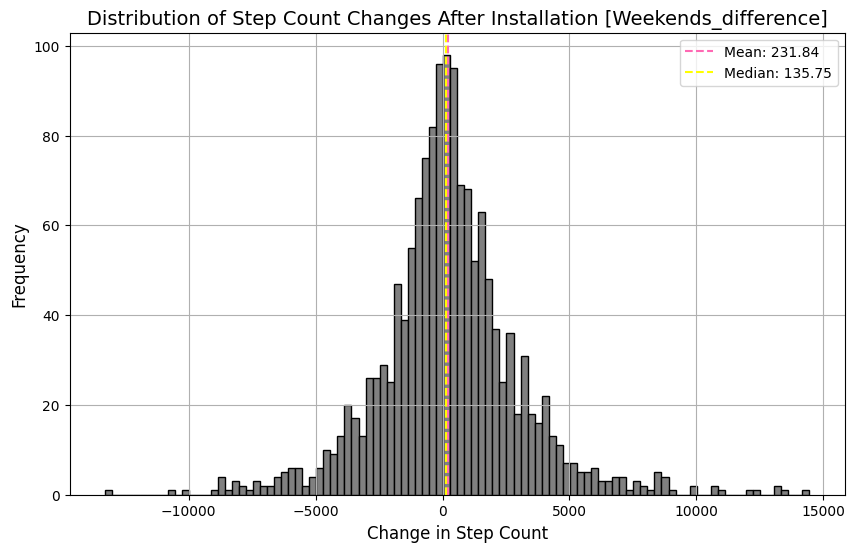

In [259]:
changes_weekends = pivot_summary['Weekends_difference']

# Create a histogram to visualize the distribution of step count changes
plt.figure(figsize=(10, 6))
plt.hist(changes_weekends, bins=100, color='grey', edgecolor='black')

# Add vertical lines for mean and median
plt.axvline(changes_weekends.mean(), color='hotpink', linestyle='--', label=f'Mean: {changes_weekends.mean():.2f}')
plt.axvline(changes_weekends.median(), color='yellow', linestyle='--', label=f'Median: {changes_weekends.median():.2f}')

plt.title('Distribution of Step Count Changes After Installation [Weekends_difference]', fontsize=14)
plt.xlabel('Change in Step Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

plt.grid(True)

plt.show()

Check if data for difference is normally distributed

In [260]:
# Perform the Shapiro-Wilk test for normality
stat, p = shapiro(pivot_summary['Weekends_difference'])
print(f"Shapiro-Wilk Statistic: {stat}, P-value: {p}")

# No, it is not normally distributed

Shapiro-Wilk Statistic: 0.9540521482247781, P-value: 2.91508628854848e-21


## Data Analysis for all platforms

#### Check overall imapct among all users
- mean 
- median (as there could be days with huge activity that can affect our results)
- percentage of users who increased activity

#### changes_weekdays

In [261]:
mean_change_weekdays = changes_weekdays.mean()
median_change_weekdays = changes_weekdays.median()
positive_changes_percentage_weekdays = (changes_weekdays > 0).sum() / len(changes_weekdays) * 100


print(f"Mean change: {mean_change_weekdays:.2f}")
print(f"Median change: {median_change_weekdays:.2f}")
print(f"Percentage of users with increased activity: {positive_changes_percentage_weekdays:.2f}%")

Mean change: 281.03
Median change: 244.70
Percentage of users with increased activity: 56.32%


Wilcoxon test

Data is not normally distributed, it samples are dependent (before/after).

In [262]:
# Perform the Wilcoxon signed-rank test
stat, p = wilcoxon(pivot_summary['Weekdays_after'], pivot_summary['Weekdays_before'])

if p < 0.05:
    print(f"There is a statistically significant change, P-value: {p}")
else:
    print(f"There is no statistically significant change, P-value: {p}")

There is a statistically significant change, P-value: 4.774484676311691e-07


#### changes_weekends

In [263]:
mean_change_weekends = changes_weekends.mean()
median_change_weekends = changes_weekends.median()
positive_changes_percentage_weekends = (changes_weekends > 0).sum() / len(changes_weekends) * 100


print(f"Mean change: {mean_change_weekends:.2f}")
print(f"Median change: {median_change_weekends:.2f}")
print(f"Percentage of users with increased activity: {positive_changes_percentage_weekends:.2f}%")

Mean change: 231.84
Median change: 135.75
Percentage of users with increased activity: 53.44%


In [264]:
# Perform the Wilcoxon signed-rank test
stat, p = wilcoxon(pivot_summary['Weekends_after'], pivot_summary['Weekends_before'])

if p < 0.05:
    print(f"There is a statistically significant change, P-value: {p}")
else:
    print(f"There is no statistically significant change, P-value: {p}")

There is a statistically significant change, P-value: 0.002162997053529979


## Data Analysis by platforms
Different platforms may have varying impacts on step count trends. If one platform dominates the dataset, it could disproportionately influence the overall results, potentially skewing conclusions about whether activity levels have increased after installation.

### android

In [265]:
android_df = pivot_summary.loc[pivot_summary['platform'] == 'ANDROID']
android_df.shape

(73, 8)

The total dataset for android users have only 73 participants, so as sample size is small, I calculate weekends and weekdays together.

In [266]:
android_df = df_copy.loc[df_copy['platform'] == 'ANDROID']
android_df

,user_id,platform,reg_date,steps_date,steps,days_from_reg,period,weekday,day_type
18,41233528,ANDROID,2021-03-11,2021-02-27,7700,-12,before,5,Weekends
58,41669474,ANDROID,2021-04-10,2021-04-14,9208,4,after,2,Weekdays
87,41279224,ANDROID,2021-03-16,2021-03-26,1373,10,after,4,Weekdays
119,41206379,ANDROID,2021-03-07,2021-02-21,3417,-14,before,6,Weekends
123,41150562,ANDROID,2021-02-28,2021-02-21,9631,-7,before,6,Weekends
...,...,...,...,...,...,...,...,...,...
81319,41537800,ANDROID,2021-03-29,2021-03-22,5116,-7,before,0,Weekdays
81414,40927790,ANDROID,2021-02-02,2021-01-24,6287,-9,before,6,Weekends
81423,41110093,ANDROID,2021-02-22,2021-02-12,4279,-10,before,4,Weekdays
81468,40799290,ANDROID,2021-01-21,2021-01-08,2719,-13,before,4,Weekdays


In [267]:
# Group by user_id, period (before/after)
android_summary = android_df.groupby(['user_id', 'period'])['steps'].mean().unstack()

# Reset index
android_summary = android_summary.reset_index()
android_summary.columns.name = None

android_summary

,user_id,after,before
0,40616022,4148.000000,698.000000
1,40736293,4760.214286,738.000000
2,40736310,9893.571429,3458.000000
3,40743899,2055.428571,1904.357143
4,40755219,4983.000000,911.000000
...,...,...,...
124,41729763,3103.857143,1808.071429
125,41730285,1429.600000,843.846154
126,41749298,3908.500000,1967.000000
127,41762389,2358.333333,1197.000000


In [268]:
# Inner join for android users and their platforms 
android_summary = android_summary.merge(platforms, on='user_id', how='inner')
android_summary.columns.name = None

# Calculate after - before
android_summary['difference'] = android_summary['after'] - android_summary['before']

android_summary

,user_id,after,before,platform,difference
0,40616022,4148.000000,698.000000,ANDROID,3450.000000
1,40736293,4760.214286,738.000000,ANDROID,4022.214286
2,40736310,9893.571429,3458.000000,ANDROID,6435.571429
3,40743899,2055.428571,1904.357143,ANDROID,151.071429
4,40755219,4983.000000,911.000000,ANDROID,4072.000000
...,...,...,...,...,...
124,41729763,3103.857143,1808.071429,ANDROID,1295.785714
125,41730285,1429.600000,843.846154,ANDROID,585.753846
126,41749298,3908.500000,1967.000000,ANDROID,1941.500000
127,41762389,2358.333333,1197.000000,ANDROID,1161.333333


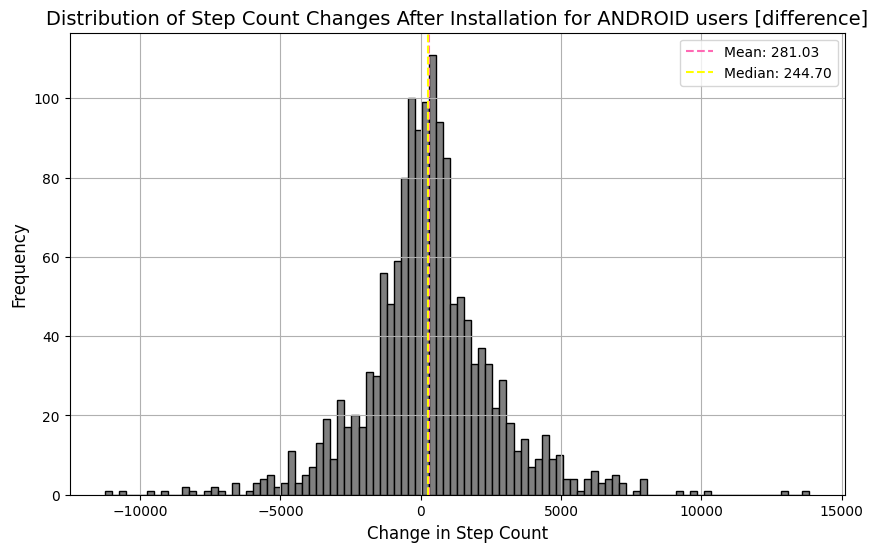

In [269]:
changes_android = android_summary['difference']

# Create a histogram to visualize the distribution of step count changes
plt.figure(figsize=(10, 6))
plt.hist(changes_weekdays, bins=100, color='grey', edgecolor='black')

# Add vertical lines for mean and median
plt.axvline(changes_weekdays.mean(), color='hotpink', linestyle='--', label=f'Mean: {changes_weekdays.mean():.2f}')
plt.axvline(changes_weekdays.median(), color='yellow', linestyle='--', label=f'Median: {changes_weekdays.median():.2f}')

plt.title('Distribution of Step Count Changes After Installation for ANDROID users [difference]', fontsize=14)
plt.xlabel('Change in Step Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

plt.grid(True)

plt.show()

In [270]:
mean_change_a = changes_android.mean()
median_change_a = changes_android.median()
positive_changes_percentage_a = (changes_android > 0).sum() / len(changes_android) * 100


print(f"Mean change: {mean_change_a:.2f}")
print(f"Median change: {median_change_a:.2f}")
print(f"Percentage of users with increased activity: {positive_changes_percentage_a:.2f}%")

Mean change: 928.87
Median change: 693.14
Percentage of users with increased activity: 65.12%


In [271]:
# Perform the Wilcoxon signed-rank test
stat_android, p_android = wilcoxon(android_summary['after'], android_summary['before'])

if p < 0.05:
    print(f"There is a statistically significant change, P-value: {p}")
else:
    print(f"There is no statistically significant change, P-value: {p}")

There is a statistically significant change, P-value: 0.002162997053529979


### ios

In [272]:
ios_df = pivot_summary.loc[pivot_summary['platform'] == 'IOS']
ios_df

,user_id,Weekdays_after,Weekdays_before,Weekends_after,Weekends_before,platform,Weekdays_difference,Weekends_difference
0,19161801,6624.80,3468.20,7890.50,2003.00,IOS,3156.60,5887.50
1,20395818,474.25,1313.10,386.00,308.00,IOS,-838.85,78.00
2,39957739,1138.43,1077.11,1164.75,579.75,IOS,61.32,585.00
3,40572583,2812.70,3341.78,2545.00,2641.50,IOS,-529.08,-96.50
4,40735506,874.60,1185.20,1034.75,1237.25,IOS,-310.60,-202.50
...,...,...,...,...,...,...,...,...
1490,41758248,12543.00,8454.10,5642.00,5671.25,IOS,4088.90,-29.25
1491,41758267,5185.50,10990.40,3701.00,11863.50,IOS,-5804.90,-8162.50
1492,41758796,15627.33,13269.50,14514.00,16732.00,IOS,2357.83,-2218.00
1493,41759233,3171.67,5250.20,3542.00,5857.75,IOS,-2078.53,-2315.75


#### Weekdays_difference

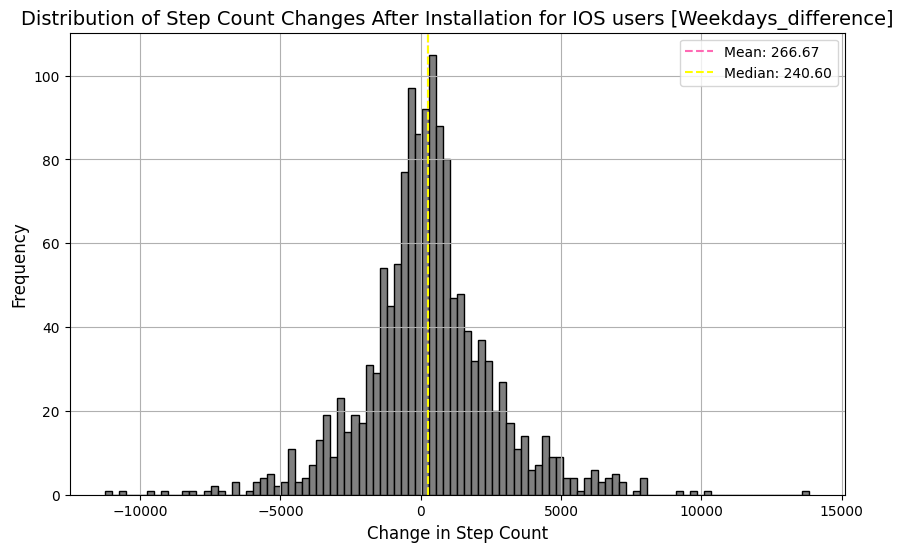

In [273]:
changes_ios = ios_df['Weekdays_difference']

# Create a histogram to visualize the distribution of step count changes
plt.figure(figsize=(10, 6))
plt.hist(changes_ios, bins=100, color='grey', edgecolor='black')

# Add vertical lines for mean and median
plt.axvline(changes_ios.mean(), color='hotpink', linestyle='--', label=f'Mean: {changes_ios.mean():.2f}')
plt.axvline(changes_ios.median(), color='yellow', linestyle='--', label=f'Median: {changes_ios.median():.2f}')

plt.title('Distribution of Step Count Changes After Installation for IOS users [Weekdays_difference]', fontsize=14)
plt.xlabel('Change in Step Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

plt.grid(True)

plt.show()

In [274]:
mean_change_ios = changes_ios.mean()
median_change_ios = changes_ios.median()
positive_changes_percentage_ios = (changes_ios > 0).sum() / len(changes_ios) * 100


print(f"Mean change: {mean_change_ios:.2f}")
print(f"Median change: {median_change_ios:.2f}")
print(f"Percentage of users with increased activity: {positive_changes_percentage_ios:.2f}%")

Mean change: 266.67
Median change: 240.60
Percentage of users with increased activity: 55.91%


In [275]:
# Perform the Wilcoxon signed-rank test
stat_ios, p_ios= wilcoxon(ios_df['Weekdays_after'], ios_df['Weekdays_before'])

if p < 0.05:
    print(f"There is a statistically significant change, P-value: {p}")
else:
    print(f"There is no statistically significant change, P-value: {p}")

There is a statistically significant change, P-value: 0.002162997053529979


#### Weekends_difference

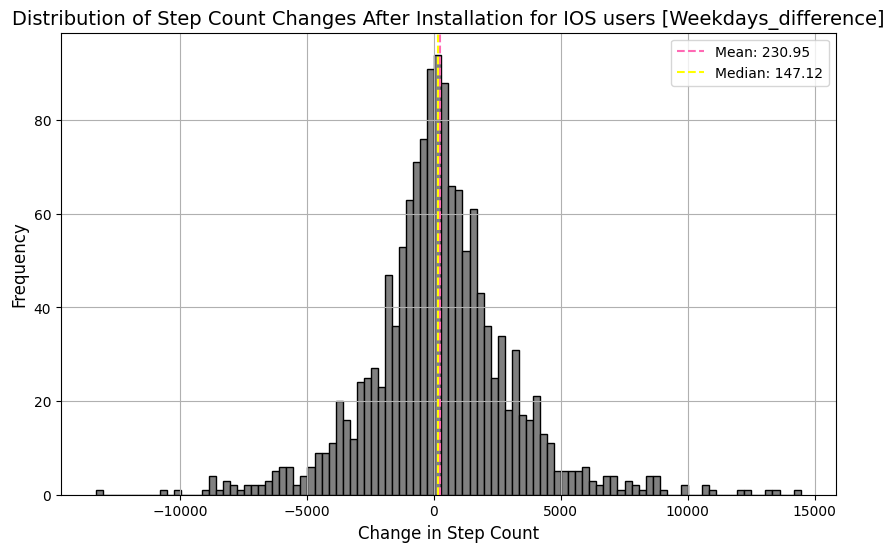

In [276]:
changes_ios = ios_df['Weekends_difference']

# Create a histogram to visualize the distribution of step count changes
plt.figure(figsize=(10, 6))
plt.hist(changes_ios, bins=100, color='grey', edgecolor='black')

# Add vertical lines for mean and median
plt.axvline(changes_ios.mean(), color='hotpink', linestyle='--', label=f'Mean: {changes_ios.mean():.2f}')
plt.axvline(changes_ios.median(), color='yellow', linestyle='--', label=f'Median: {changes_ios.median():.2f}')

plt.title('Distribution of Step Count Changes After Installation for IOS users [Weekdays_difference]', fontsize=14)
plt.xlabel('Change in Step Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

plt.grid(True)

plt.show()

In [277]:
mean_change_ios = changes_ios.mean()
median_change_ios = changes_ios.median()
positive_changes_percentage_ios = (changes_ios > 0).sum() / len(changes_ios) * 100


print(f"Mean change: {mean_change_ios:.2f}")
print(f"Median change: {median_change_ios:.2f}")
print(f"Percentage of users with increased activity: {positive_changes_percentage_ios:.2f}%")

Mean change: 230.95
Median change: 147.12
Percentage of users with increased activity: 53.38%


In [278]:
# Perform the Wilcoxon signed-rank test
stat_ios, p_ios= wilcoxon(ios_df['Weekends_after'], ios_df['Weekends_before'])

if p < 0.05:
    print(f"There is a statistically significant change, P-value: {p}")
else:
    print(f"There is no statistically significant change, P-value: {p}")

There is a statistically significant change, P-value: 0.002162997053529979


## Results

Among all platforms
- Weekdays:

1. The average increase in activity on weekdays is 281.03 steps.
2. The median increase of 244.70 steps indicates that most users experienced a modest rise in activity levels, with the mean slightly higher, suggesting the presence of a few high-activity outliers.
3. 56.32% of users increased their weekday activity.

- Weekends:

1. The average increase in activity on weekends is 231.84 steps.
2. The median increase of 135.75 steps.
3. 53.44% of users increased their weekend activity.
_________________________________
Android

Amount of android users is sagnificantly lower than IOS users, so to analyse how such users behaviour it was concluded that they would be treated as one group with no splitting of weekdays and weekends. 
- Analysis showed that after installation of the app, activity was increased by 65.12%
- Average uplift in steps is around ~950, indicating a positive shift in overall user behavior.
- The median increase in activity is 693.14 steps, suggesting that at least half of the users increased their step count by approximately this amount. 
_________________________________
IOS
- Weekdays:

1. The average increase in activity on weekdays is 266.67 steps, indicating a slight positive shift in user behavior during weekdays.
2. The median increase of 240.60 steps.
3. 55.91% of users increased their weekday activity.

- Weekends:

1. The average increase in activity on weekends is 230.95 steps, slightly lower than the weekday average.
2. The median increase of 147.12 steps shows that the central trend for weekend activity changes is less pronounced compared to weekdays.
3. 53.38% of users increased their weekend activity.

_________________________________
Wilcoxon signed-rank test was choosen as our distributions do not follow normal one (checked by Shapiro-Wilk test) and both groups are dependent. 

All results are statistically significant.

The app has a positive impact on user activity across all platforms.

![Kitty](images.jpeg)